# Homework 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('/Users/ashleychen/Desktop/UIUC/IE 598/HW4/Dataset/housing2.csv', 
                 header = 0)

## EDA

In [2]:
shape = df.shape
print('Shape = {}\n'.format(shape)) 

Shape = (506, 27)



### Determining the Nature of Attributes

In [3]:
df.dtypes

ATT1       float64
ATT2       float64
ATT3       float64
ATT4       float64
ATT5       float64
ATT6       float64
ATT7       float64
ATT8       float64
ATT9       float64
ATT10      float64
ATT11      float64
ATT12      float64
ATT13      float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### A table of summary statistics for each of the 13 explanatory variables

In [4]:
print(df.iloc[:,-14:-1].describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     1.269195   13.295257    9.205158    0.140765    1.101175   15.679800   
std      2.399207   23.048697    7.169630    0.312765    1.646991   27.220206   
min      0.000000    0.000000    0.000000    0.000000    0.385000    3.561000   
25%      0.049442    0.000000    3.440000    0.000000    0.449000    5.961500   
50%      0.144655    0.000000    6.960000    0.000000    0.538000    6.322500   
75%      0.819622   18.100000   18.100000    0.000000    0.647000    6.949000   
max      9.966540  100.000000   27.740000    1.000000    7.313000  100.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    58.744660    6.173308   78.063241  339.317787   42.614980  332.791107   
std     33.104049    6.4764

### Heatmap for showing correlation for 13 explanatory variables

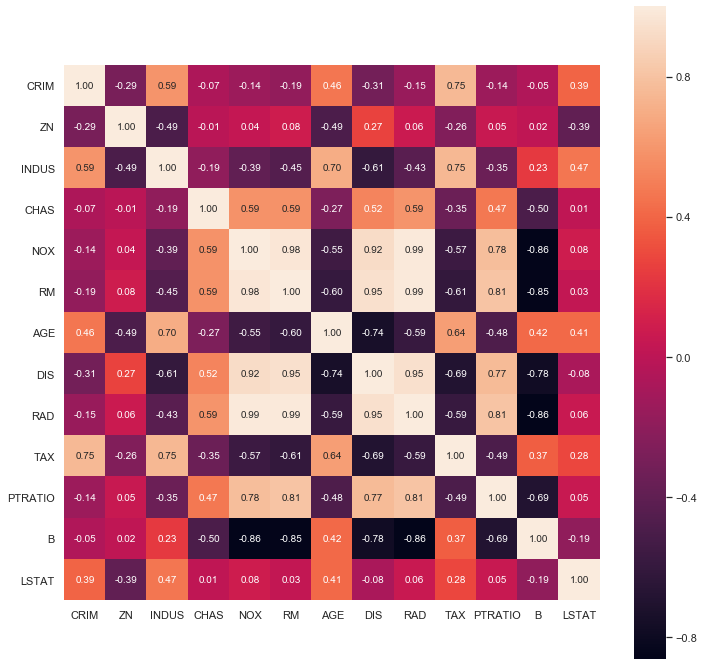

In [5]:
data = df.iloc[:,-14:-1].values.T
cm =  np.corrcoef(data)
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(12,12))
col = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
hm = sns.heatmap(cm,
                cbar=True,
                square=True,
                fmt='.2f',
                annot=True,
                annot_kws={'size':10},
                yticklabels=col,
                xticklabels=col)
plt.show()

### Identifying missing values

In [6]:
df.isnull().sum()

ATT1        0
ATT2        0
ATT3        0
ATT4        0
ATT5        0
ATT6        0
ATT7        0
ATT8        0
ATT9        0
ATT10       0
ATT11       0
ATT12       0
ATT13       0
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

Since we identify there are 54 missing values for MEDV, we should impute missing values.

### Imputing missing values

In [7]:
imputed_data = df.fillna(df.mean())
print(imputed_data)

         ATT1      ATT2      ATT3      ATT4      ATT5      ATT6      ATT7  \
0    0.038327  0.592379  0.655174  0.119839  0.652477  0.984323  0.206738   
1    0.225022  0.983103  0.803619  0.836315  0.163104  0.637497  0.008760   
2    0.423233  0.375808  0.271293  0.729824  0.886744  0.043703  0.457700   
3    0.743370  0.929103  0.589894  0.644012  0.110490  0.774604  0.306483   
4    0.378623  0.786609  0.712752  0.110274  0.762133  0.030069  0.316631   
5    0.512719  0.478676  0.131169  0.031796  0.444457  0.691521  0.719076   
6    0.371941  0.857127  0.807076  0.388729  0.265246  0.032373  0.669785   
7    0.691226  0.349011  0.228136  0.167600  0.594631  0.809890  0.514929   
8    0.686431  0.224574  0.444599  0.707614  0.029798  0.658894  0.315918   
9    0.747860  0.379863  0.107704  0.766033  0.208782  0.945102  0.027574   
10   0.833772  0.255716  0.640570  0.716492  0.801783  0.461383  0.119640   
11   0.060460  0.071766  0.229253  0.222621  0.645459  0.292982  0.885505   

### Split data into training and test sets

In [8]:
X = imputed_data.drop(['MEDV'],axis = 1).values
y = imputed_data['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## Linear Regressions

In [9]:
slr = linear_model.LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print(slr.coef_)
print(slr.intercept_)

[ 2.44323141e+00 -1.96007605e+00  9.04103728e-01 -2.20920896e-01
 -1.53559996e+00 -1.65375259e+00  1.90549465e+00  2.16867704e-01
  2.50584061e-02 -2.95982494e-01 -4.35769410e-01  9.14420354e-01
  5.59919395e-02  2.02691077e-01  8.89734542e-02 -1.90598446e-01
  3.62133432e+00 -7.87936580e-01  7.91310113e-02  2.72989435e-03
 -1.82658928e+00  4.38893789e-02 -1.21328799e-02  2.14434582e-03
  9.93297733e-03 -8.34255613e-01]
41.101658799465426


### Plot the residual errors

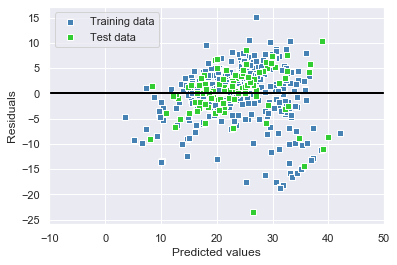

In [10]:
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'steelblue', marker = 's', edgecolor = 'white',
           label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show()

### Calculate MSE and R2

In [11]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
           r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))
    

MSE train: 29.493, test: 24.129
R^2 train: 0.587, test: 0.592


## Ridge Regression

For alpha = 1,

[ 1.13929129e+00 -1.06478503e+00  7.97799764e-01 -4.84896038e-01
 -7.32683802e-01 -3.89727284e-01  5.94175820e-01  4.88416081e-02
 -3.62320260e-02 -4.72118422e-01 -2.61044350e-01  3.99568022e-01
 -2.07669856e-01 -1.55980693e-01  2.12249116e-02 -9.36769100e-02
  2.20308870e+00 -7.58828327e-02  3.48125726e-04 -8.27430855e-04
 -5.48952546e-02 -4.74245043e-04 -2.81825975e-03 -5.28027575e-04
  3.97925991e-03 -3.86927751e-01]
29.317616475909873


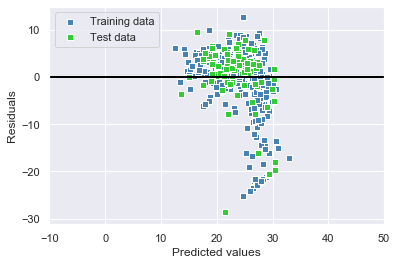

MSE train: 42.228, test: 35.136
R^2 train: 0.409, test: 0.407


In [12]:
ridge = Ridge(alpha = 1, normalize = True)
ridge.fit(X_train, y_train)
print(ridge.coef_)
print(ridge.intercept_)

ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)
plt.scatter(ridge_train_pred, ridge_train_pred - y_train, c = 'steelblue', marker = 's', edgecolor = 'white',
           label = 'Training data')
plt.scatter(ridge_test_pred, ridge_test_pred - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show()

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ridge_train_pred),
        mean_squared_error(y_test, ridge_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
           r2_score(y_train, ridge_train_pred),
           r2_score(y_test, ridge_test_pred)))
    

For alpha = 0.1

[ 2.13930109e+00 -2.00601047e+00  1.00357071e+00 -3.24226135e-01
 -1.44857819e+00 -9.95600857e-01  1.44036770e+00 -5.97187485e-02
 -1.15630130e-01 -3.79266516e-01 -3.03006141e-01  7.67652913e-01
  9.61612907e-02  9.84164891e-02  3.76757558e-02 -1.13183278e-01
  4.18596664e+00  1.50060577e-01  3.08553992e-02  2.48148783e-02
 -3.78823389e-01  2.03071332e-03 -7.18249827e-03  3.09907474e-03
  6.54984262e-03 -7.60910289e-01]
32.72384961445475


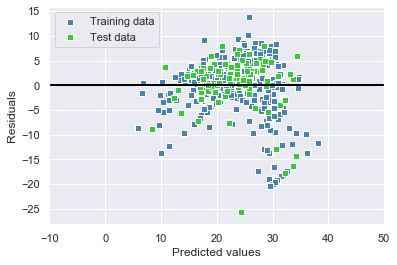

MSE train: 32.649, test: 27.429
R^2 train: 0.543, test: 0.537


In [13]:
ridge_1 = Ridge(alpha = 0.1, normalize = True)
ridge_1.fit(X_train, y_train)
print(ridge_1.coef_)
print(ridge_1.intercept_)

ridge_1_train_pred = ridge_1.predict(X_train)
ridge_1_test_pred = ridge_1.predict(X_test)
plt.scatter(ridge_1_train_pred, ridge_1_train_pred - y_train, c = 'steelblue', marker = 's', edgecolor = 'white',
           label = 'Training data')
plt.scatter(ridge_1_test_pred, ridge_1_test_pred - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show()

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ridge_1_train_pred),
        mean_squared_error(y_test, ridge_1_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
           r2_score(y_train, ridge_1_train_pred),
           r2_score(y_test, ridge_1_test_pred)))


For alpha = 2

[ 7.49312652e-01 -6.87156867e-01  6.30348333e-01 -3.78912696e-01
 -4.70193464e-01 -2.20105517e-01  3.75535967e-01  6.69434212e-02
 -6.18675725e-04 -4.17059144e-01 -1.87688830e-01  2.64445291e-01
 -2.48717514e-01 -1.59705317e-01  1.78270809e-02 -7.66816918e-02
  1.35506091e+00 -6.95132795e-02 -9.71101314e-04 -4.36274770e-03
 -2.54261312e-02 -4.53146090e-04 -2.17085626e-03 -7.47185345e-04
  2.94838170e-03 -2.62088018e-01]
28.01203394411378


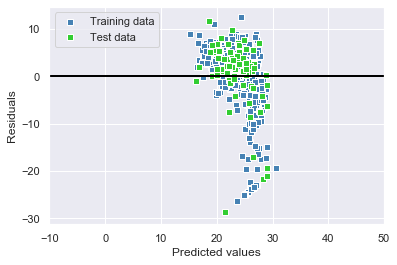

MSE train: 47.989, test: 39.430
R^2 train: 0.328, test: 0.334


In [14]:
ridge_2 = Ridge(alpha = 2, normalize = True)
ridge_2.fit(X_train, y_train)
print(ridge_2.coef_)
print(ridge_2.intercept_)

ridge_2_train_pred = ridge_2.predict(X_train)
ridge_2_test_pred = ridge_2.predict(X_test)
plt.scatter(ridge_2_train_pred, ridge_2_train_pred - y_train, c = 'steelblue', marker = 's', edgecolor = 'white',
           label = 'Training data')
plt.scatter(ridge_2_test_pred, ridge_2_test_pred - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show()

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ridge_2_train_pred),
        mean_squared_error(y_test, ridge_2_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
           r2_score(y_train, ridge_2_train_pred),
           r2_score(y_test, ridge_2_test_pred)))


## Lasso Regression

For alpha = 1,

[ 0. -0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.  0. -0.  0. -0.
  0. -0.  0. -0. -0. -0.  0. -0.]
23.981111451853153


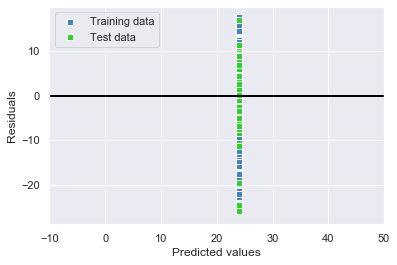

MSE train: 71.407, test: 60.512
R^2 train: 0.000, test: -0.022


In [15]:
lasso = Lasso(alpha = 1.0, normalize = True)
lasso.fit(X_train, y_train)
print(lasso.coef_)
print(lasso.intercept_)

lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)
plt.scatter(lasso_train_pred, lasso_train_pred - y_train, c = 'steelblue', marker = 's', edgecolor = 'white',
           label = 'Training data')
plt.scatter(lasso_test_pred, lasso_test_pred - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw = 2)
plt.xlim([-10,50])
plt.show()

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, lasso_train_pred),
        mean_squared_error(y_test, lasso_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
           r2_score(y_train, lasso_train_pred),
           r2_score(y_test, lasso_test_pred)))

For alpha = 0.1,

[ 0.         -0.          0.         -0.         -0.         -0.
  0.          0.          0.         -0.         -0.          0.
 -0.         -0.          0.         -0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
  0.         -0.59319435]
30.775257035315743


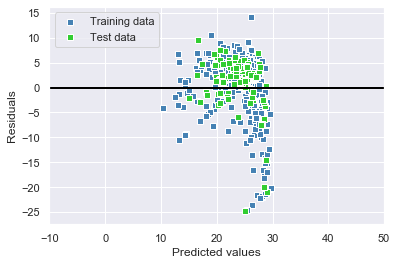

MSE train: 43.200, test: 35.306
R^2 train: 0.395, test: 0.404


In [16]:
lasso_1 = Lasso(alpha = 0.1, normalize = True)
lasso_1.fit(X_train, y_train)
print(lasso_1.coef_)
print(lasso_1.intercept_)

lasso_1_train_pred = lasso_1.predict(X_train)
lasso_1_test_pred = lasso_1.predict(X_test)
plt.scatter(lasso_1_train_pred, lasso_1_train_pred - y_train, c = 'steelblue', marker = 's', edgecolor = 'white',
           label = 'Training data')
plt.scatter(lasso_1_test_pred, lasso_1_test_pred - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show()

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, lasso_1_train_pred),
        mean_squared_error(y_test, lasso_1_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
           r2_score(y_train, lasso_1_train_pred),
           r2_score(y_test, lasso_1_test_pred)))


For alpha = 0.01,

[ 1.55509998 -1.60586176  0.4571537  -0.         -1.21122104 -0.26230065
  0.66923164  0.         -0.         -0.         -0.          0.
  0.          0.          0.01924318 -0.03889085  4.16432856  0.
  0.          0.01464876 -0.19824847  0.         -0.0061909   0.
  0.         -0.83981147]
35.72534991254746


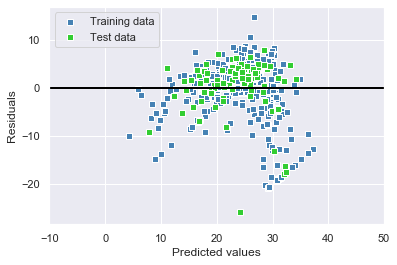

MSE train: 34.166, test: 28.658
R^2 train: 0.522, test: 0.516


In [17]:
lasso_2 = Lasso(alpha = 0.01, normalize = True)
lasso_2.fit(X_train, y_train)
print(lasso_2.coef_)
print(lasso_2.intercept_)

lasso_2_train_pred = lasso_2.predict(X_train)
lasso_2_test_pred = lasso_2.predict(X_test)
plt.scatter(lasso_2_train_pred, lasso_2_train_pred - y_train, c = 'steelblue', marker = 's', edgecolor = 'white',
           label = 'Training data')
plt.scatter(lasso_2_test_pred, lasso_2_test_pred - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show()

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, lasso_2_train_pred),
        mean_squared_error(y_test, lasso_2_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
           r2_score(y_train, lasso_2_train_pred),
           r2_score(y_test, lasso_2_test_pred)))

In [18]:
print("My name is Yu Chi Chen")
print("My NetID is: yuchicc2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yu Chi Chen
My NetID is: yuchicc2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
